# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from pandas_datareader import wb

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


In [20]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Read and clean data

In [2]:
wb_gini = wb.download(country='all', indicator='SI.POV.GINI', start=1990, end=2017)
wb_gini = wb_gini.rename(columns = {'SI.POV.GINI':'GINI'})
wb_gini = wb_gini.reset_index()
wb_gini.year = wb_gini.year.astype(int) # convert year
wb_gini.country = wb_gini.country.astype('string') # convert country to the special pandas string type
wb_gini.info()

wb_gdp = wb.download(country='all', indicator='NY.GDP.PCAP.KD', start=1990, end=2017)
wb_gdp = wb_gdp.rename(columns = {'NY.GDP.PCAP.KD':'GDP'})
wb_gdp.reset_index(inplace = True)
wb_gdp.year = wb_gdp.year.astype(int)
wb_gdp.country = wb_gdp.country.astype('string') # convert country to the special pandas string type
wb_gdp.info()
wb_gdp.head()

wb = pd.merge(wb_gini, wb_gdp, how = 'outer', on = ['country','year']);
wb.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7448 entries, 0 to 7447
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7448 non-null   string 
 1   year     7448 non-null   int32  
 2   GINI     1582 non-null   float64
dtypes: float64(1), int32(1), string(1)
memory usage: 145.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7448 entries, 0 to 7447
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7448 non-null   string 
 1   year     7448 non-null   int32  
 2   GDP      6772 non-null   float64
dtypes: float64(1), int32(1), string(1)
memory usage: 145.6 KB


,country,year,GINI,GDP
0,Africa Eastern and Southern,2017,NaN,1534.683482
1,Africa Eastern and Southern,2016,NaN,1534.924746
2,Africa Eastern and Southern,2015,NaN,1538.552268
3,Africa Eastern and Southern,2014,NaN,1537.159571
4,Africa Eastern and Southern,2013,NaN,1518.482850


In [4]:
wb_wgi=pd.read_csv("WB WGI Levels.csv")

# These columns have to go: 'Unnamed: 0' 'Unnamed: 1' 'Unnamed: 2' 'Unnamed: 3'
drop_these = ['Country Code','Series Code'] # use list comprehension to create list of columns
wb_wgi.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
wb_wgi.head(5)

col_dict = {}
for i in range(1996, 2022): # range goes from 1996 to 2021
    col_dict[str(i)+" [YR"+str(i)+"]"] = f'wgi{i}' 
col_dict

wb_wgi.rename(columns = col_dict, inplace=True)
wb_wgi.rename (columns ={'Country Name': 'country'}, inplace=True)
wb_wgi.sample(10)

,country,Series Name,wgi1996,wgi1998,wgi2000,wgi2002,wgi2003,wgi2004,wgi2005,wgi2006,...,wgi2012,wgi2013,wgi2014,wgi2015,wgi2016,wgi2017,wgi2018,wgi2019,wgi2020,wgi2021
1044,Somalia,Control of Corruption: Estimate,-1.27383208274841,-1.1692898273468,-1.23153555393219,-1.03293061256409,-1.46591007709503,-1.80303514003754,-1.68311214447021,-1.72492063045502,...,-1.59658908843994,-1.58308362960815,-1.6630871295929,-1.62507259845734,-1.6770498752594,-1.69455707073212,-1.7698016166687,-1.70907258987427,-1.67067217826843,-1.77805280685425
353,El Salvador,Voice and Accountability: Estimate,-0.102704912424088,0.0431398078799248,-0.043113961815834,0.122130692005157,0.10748229175806,0.0246405247598886,-0.0750127732753754,0.0966298580169678,...,-0.0401937253773212,-0.0130920791998506,0.152619868516922,0.152402803301811,0.188971519470215,0.154455736279488,0.0221808888018131,0.11914150416851,0.0725487992167473,-0.0552322864532471
182,Burkina Faso,Political Stability and Absence of Violence/Te...,-0.300746202468872,-0.112211242318153,0.059820331633091,-0.306921243667603,0.0671200677752495,-0.0812375172972679,-0.0626529157161713,0.155799552798271,...,-0.573129236698151,-0.763390123844147,-0.787128567695618,-0.611107409000397,-0.86737585067749,-0.926977336406708,-1.05928659439087,-1.30238652229309,-1.53830862045288,-1.63874197006226
925,Poland,Government Effectiveness: Estimate,0.681182622909546,0.624520897865295,0.568725228309631,0.454926639795303,0.51291811466217,0.441544532775879,0.454148411750793,0.337945520877838,...,0.656751573085785,0.658575594425201,0.768318057060242,0.768213629722595,0.68496310710907,0.582646310329437,0.579374313354492,0.543930947780609,0.359848201274872,0.292776763439178
124,Belize,Rule of Law: Estimate,0.084681548178196,-0.106160081923008,0.0983268246054649,-0.0455109514296055,0.190566956996918,-0.0529214031994343,-0.0485887080430985,0.0238666515797377,...,-0.435866832733154,-0.451345652341843,-0.814310550689697,-0.775928318500519,-0.957332134246826,-0.960104882717133,-0.826132237911224,-0.836393356323242,-0.802425146102905,-0.77817302942276
198,Cambodia,Control of Corruption: Estimate,-1.01984238624573,-0.98831170797348,-0.967182695865631,-0.990784227848053,-0.989836037158966,-1.05834627151489,-1.22373998165131,-1.26038551330566,...,-1.08068156242371,-1.0637218952179,-1.14674997329712,-1.12909400463104,-1.28380334377289,-1.29811823368073,-1.33521008491516,-1.30401802062988,-1.25004839897156,-1.17695665359497
215,Canada,Voice and Accountability: Estimate,1.56633579730988,1.55141294002533,1.53196537494659,1.49905383586884,1.54755675792694,1.66845452785492,1.50687944889069,1.41559481620789,...,1.43750536441803,1.4534866809845,1.41238820552826,1.46714651584625,1.44514811038971,1.47772514820099,1.49013364315033,1.43186473846436,1.47540128231049,1.45788443088531
55,Armenia,Government Effectiveness: Estimate,-0.380564451217651,-0.546766698360443,-0.546417593955994,-0.0457692667841911,-0.190817549824715,-0.108692862093449,-0.139261931180954,-0.261045575141907,...,-0.0269024036824703,0.0853265821933746,-0.251768827438354,-0.276716083288193,-0.275093078613281,-0.215339452028275,-0.141409367322922,-0.197479233145714,-0.274477034807205,-0.249556034803391
1126,"Taiwan, China",Rule of Law: Estimate,0.759700000286102,0.741965651512146,0.812561929225922,0.862484455108643,0.947547614574432,0.984944701194763,1.01513648033142,0.773827016353607,...,1.04393982887268,1.04358446598053,1.18554127216339,1.15710282325745,1.13375520706177,1.13206970691681,1.1047295331955,1.13455474376678,1.26052606105804,1.29620206356049
399,France,Regulatory Quality: Estimate,1.04877638816833,0.825750648975372,0.914936780929565,0.975888848304749,1.21546447277069,1.21646451950073,1.24496161937714,1.23982167243958,...,1.12417411804199,1.14989483356476,1.07406842708588,1.12526154518127,1.06685316562653,1.15498411655426,1.15491461753845,1.43873500823975,1.1989494562149,1.23555743694305


In [5]:
wb_wgi = pd.wide_to_long(wb_wgi, stubnames='wgi', i=['country','Series Name'], j='year')
wb_wgi = wb_wgi.reset_index()
# Rename colum with series names to "ser"
wb_wgi.rename(columns = {'Series Name':'ser'}, inplace=True)

#Get a list of all the series in the data
namelist = wb_wgi.ser.unique()

newnames = {'Control of Corruption: Estimate':'COC',
            'Government Effectiveness: Estimate':'GOV', 
            'Political Stability and Absence of Violence/Terrorism: Estimate':'RSA', 
            'Regulatory Quality: Estimate':'REQ', 
            'Rule of Law: Estimate':'ROL', 
            'Voice and Accountability: Estimate':'VOA'}

# Renames series
for index, name in enumerate(namelist):
    print(index, "Now rename Series", name, "=", newnames[name])
    
    wb_wgi.loc[wb_wgi.ser == name, 'ser'] = newnames[name]

newnamelist = wb_wgi.ser.unique()

wb_wgi.sample(5)

0 Now rename Series Control of Corruption: Estimate = COC
1 Now rename Series Government Effectiveness: Estimate = GOV
2 Now rename Series Political Stability and Absence of Violence/Terrorism: Estimate = RSA
3 Now rename Series Regulatory Quality: Estimate = REQ
4 Now rename Series Rule of Law: Estimate = ROL
5 Now rename Series Voice and Accountability: Estimate = VOA


,country,ser,year,wgi
24100,Somalia,REQ,2018,-2.06632995605469
29461,Zimbabwe,RSA,2020,-1.07214713096619
23832,Slovenia,ROL,2003,0.849399566650391
25684,Syrian Arab Republic,COC,2015,-1.5525449514389
26633,Togo,VOA,2021,-0.794364869594574


In [6]:
wb_new=pd.pivot(wb_wgi, index=['country','year'], columns = 'ser', values= 'wgi')
wb_new=wb_new.reset_index()
final = pd.merge(wb, wb_new, on=['year', 'country'], how = 'outer')

In [11]:
col_list = ['COC', 'GOV', 'REQ', 'ROL', 'RSA', 'VOA']
for i in col_list:
    final.loc[final[i]==".."] = np.nan
    final[i]=final[i].astype(float)
final = final.dropna(subset=['country','year'], how='any')
final.year = final.year.astype(int)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8191 entries, 0 to 8493
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  8191 non-null   object 
 1   year     8191 non-null   int32  
 2   GINI     1577 non-null   float64
 3   GDP      6624 non-null   float64
 4   COC      4619 non-null   float64
 5   GOV      4619 non-null   float64
 6   REQ      4619 non-null   float64
 7   ROL      4619 non-null   float64
 8   RSA      4619 non-null   float64
 9   VOA      4619 non-null   float64
dtypes: float64(8), int32(1), object(1)
memory usage: 671.9+ KB


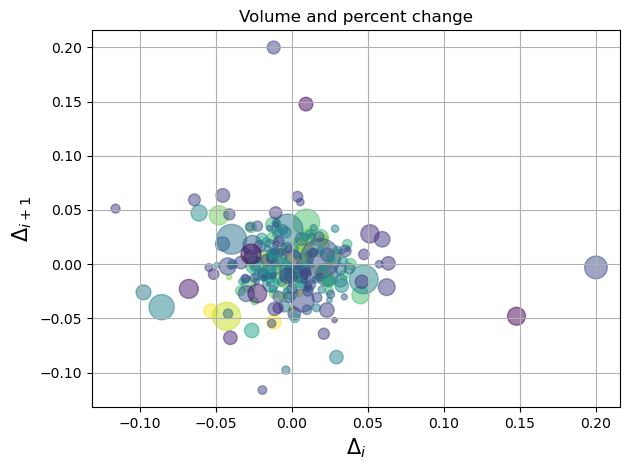

In [21]:
price_data = (cbook.get_sample_data('goog.npz', np_load=True)['price_data']
              .view(np.recarray))
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

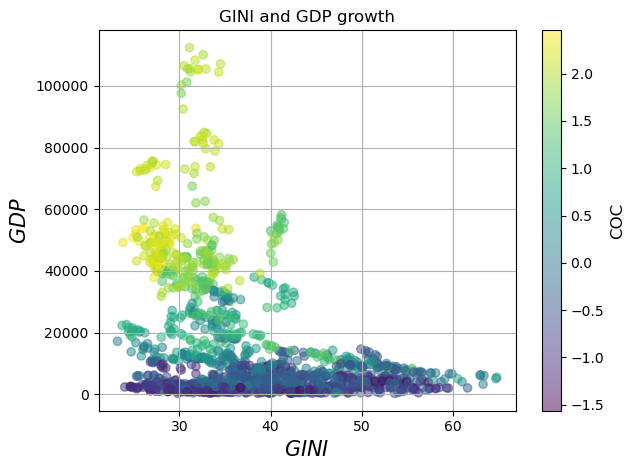

In [40]:
import matplotlib.pyplot as plt

# Assuming `final_data` is the correct DataFrame object
final_data = final.dropna(subset=['GINI','GDP','COC'], how='any')  # get the most recent 250 obs

# Marker size in units of points^2
quality = final_data.COC

fig, ax = plt.subplots()
scatter = ax.scatter(final_data.GINI, final_data.GDP, c=quality, alpha=0.5)

ax.set_xlabel(r'$GINI$', fontsize=15)
ax.set_ylabel(r'$GDP$', fontsize=15)
ax.set_title('GINI and GDP growth')

ax.grid(True)
fig.tight_layout()

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('COC', fontsize=12)  # Set color bar label

plt.show()

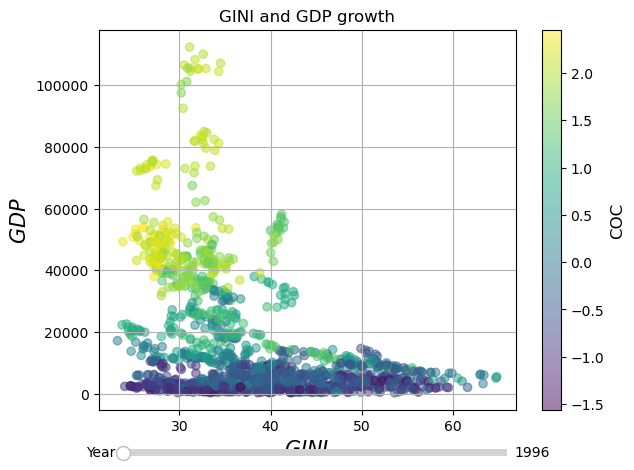

In [47]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Assuming `final_data` is the correct DataFrame object
final_data = final.dropna(subset=['GINI', 'GDP', 'COC'], how='any')  # get the most recent 250 obs

# Marker size in units of points^2
quality = final_data.COC

fig, ax = plt.subplots()
scatter = ax.scatter(final_data.GINI, final_data.GDP, c=quality, alpha=0.5)

ax.set_xlabel(r'$GINI$', fontsize=15)
ax.set_ylabel(r'$GDP$', fontsize=15)
ax.set_title('GINI and GDP growth')

ax.grid(True)
fig.tight_layout()

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('COC', fontsize=12)  # Set color bar label

years = sorted(final_data['year'].unique())  # Get unique years in ascending order

# Create slider
slider_ax = plt.axes([0.2, 0.03, 0.6, 0.03])  # left, bottom, width, height
slider = Slider(slider_ax, 'Year', years[0], years[-1], valinit=years[0], valstep=1, valfmt='%1.0f')

def update_year(val):
    year = int(slider.val)
    ax.clear()
    scatter = ax.scatter(final_data[final_data['year'] == year]['GINI'], final_data[final_data['year'] == year]['GDP'],
                         c=final_data[final_data['year'] == year]['COC'], alpha=0.5)
    ax.set_xlabel(r'$GINI$', fontsize=15)
    ax.set_ylabel(r'$GDP$', fontsize=15)
    ax.set_title('GINI and GDP growth (Year: {})'.format(year))
    ax.grid(True)
    fig.tight_layout()
    cbar.update_normal(scatter)

slider.on_changed(update_year)

plt.show()

#given variabel: træk gennemsnittet fra og divider med standardafvigelsen

Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.